In [47]:
import pandas as pd
from sklearn import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/abulbasar/data/master/kaggle-houseprice/data_combined_cleaned.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalesPrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,...,0,None,None,None,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,...,0,None,None,None,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,...,0,None,None,None,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,...,0,None,None,None,0,12,2008,WD,Normal,250000.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2919 non-null object
LotFrontage      2919 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            2919 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2919 non-null object
Exterior2nd      2919 non

In [5]:
df = df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 80 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non

In [7]:
df = df.drop(columns=["Id"])

In [56]:
target = "SalesPrice"
y = np.log(df[target])
X = df.drop(columns=[target])
X_dummy = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = model_selection\
.train_test_split(X_dummy.values, y
                , test_size = 0.3, random_state = 1)

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1
                                    , include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LinearRegression())
])

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

rmse_test = metrics.mean_squared_error(y_test, y_test_pred) ** 0.5
rmse_train = metrics.mean_squared_error(y_train, y_train_pred) ** 0.5

r2_test = metrics.r2_score(y_test, y_test_pred)
r2_train = metrics.r2_score(y_train, y_train_pred)

print("rmse of training", rmse_train)
print("rmse of test", rmse_test)
print("r2 of training", r2_train)
print("r2 of test", r2_test)

est = pipe.steps[-1][-1]

rmse of training 0.08606817747710854
rmse of test 76190488351.17424
r2 of training 0.9494518297088844
r2 of test -3.0715943247509893e+22


In [57]:
est.intercept_

12.032662828844877

In [58]:
summary = pd.DataFrame(dict(coeff=est.coef_
                , feature=X_dummy.columns))

summary.head()

,coeff,feature
0,0.012482,MSSubClass
1,0.001963,LotFrontage
2,0.031513,LotArea
3,0.056755,OverallQual
4,0.034690,OverallCond


In [59]:
summary["abs_coeff"] = np.abs(summary.coeff)
summary.head()

,coeff,feature,abs_coeff
0,0.012482,MSSubClass,0.012482
1,0.001963,LotFrontage,0.001963
2,0.031513,LotArea,0.031513
3,0.056755,OverallQual,0.056755
4,0.034690,OverallCond,0.034690


In [60]:
summary.sort_values("abs_coeff", ascending=False)

,coeff,feature,abs_coeff
15,1.501695e+11,GrLivArea,1.501695e+11
13,-1.233520e+11,2ndFlrSF,1.233520e+11
12,-1.112376e+11,1stFlrSF,1.112376e+11
219,-1.072428e+11,GarageFinish_None,1.072428e+11
134,8.844505e+10,Exterior2nd_CBlock,8.844505e+10
120,-8.844505e+10,Exterior1st_CBlock,8.844505e+10
224,7.930425e+10,GarageQual_None,7.930425e+10
229,7.930320e+10,GarageCond_None,7.930320e+10
166,6.149525e+10,BsmtCond_None,6.149525e+10
218,-5.136464e+10,GarageType_None,5.136464e+10


([], <a list of 0 Text xticklabel objects>)

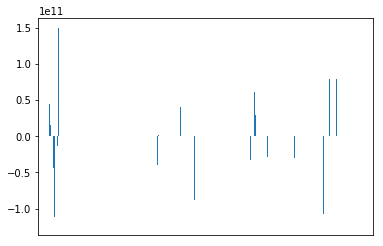

In [61]:
summary.coeff.plot.bar()
plt.xticks([])

In [62]:
result = pd.DataFrame(dict(actual = y_test
                , prediction = y_test_pred))
result["error"] = result.prediction - result.actual
result["error_abs"] = np.abs(result.error)
result.head()

,actual,prediction,error,error_abs
258,12.352335,12.290323,-0.062012,0.062012
267,12.097930,12.007516,-0.090414,0.090414
288,11.711776,11.650552,-0.061224,0.061224
649,11.344507,11.305490,-0.039017,0.039017
1233,11.863582,11.755258,-0.108324,0.108324


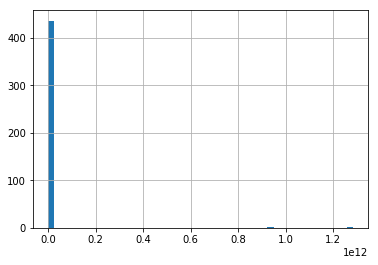

In [67]:
result.error.hist(bins = 50)

In [68]:
result.sort_values("error_abs", ascending=False)

,actual,prediction,error,error_abs
1270,12.468437,1.281787e+12,1.281787e+12,1.281787e+12
375,11.018629,9.484743e+11,9.484743e+11,9.484743e+11
1003,11.827043,1.510345e+09,1.510345e+09,1.510345e+09
1011,11.512925,1.066149e+09,1.066149e+09,1.066149e+09
120,12.100712,5.829678e+08,5.829678e+08,5.829678e+08
325,11.373663,-5.983023e+06,-5.983035e+06,5.983035e+06
810,12.106252,1.126501e+03,1.114395e+03,1.114395e+03
1386,12.429216,1.126502e+03,1.114073e+03,1.114073e+03
462,11.041048,1.174476e+01,7.037119e-01,7.037119e-01
30,10.596635,1.125554e+01,6.589056e-01,6.589056e-01


In [69]:
target = "SalesPrice"
y = np.log(df[target])
X = df.drop(columns=[target])
X_dummy = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = model_selection\
.train_test_split(X_dummy.values, y
                , test_size = 0.3, random_state = 1)

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1
                                    , include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.Lasso(alpha = 0.01, random_state=1))
])

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

rmse_test = metrics.mean_squared_error(y_test, y_test_pred) ** 0.5
rmse_train = metrics.mean_squared_error(y_train, y_train_pred) ** 0.5

r2_test = metrics.r2_score(y_test, y_test_pred)
r2_train = metrics.r2_score(y_train, y_train_pred)

print("rmse of training", rmse_train)
print("rmse of test", rmse_test)
print("r2 of training", r2_train)
print("r2 of test", r2_test)
est = pipe.steps[-1][-1]

rmse of training 0.12460754170603186
rmse of test 0.15150859029885974
r2 of training 0.8940480673803641
r2 of test 0.8785389987905549


In [70]:
print("intercept: ", est.intercept_)
summary = pd.DataFrame(dict(coeff=est.coef_
                , feature=X_dummy.columns))

summary["abs_coeff"] = np.abs(summary.coeff)
summary.sort_values("abs_coeff", ascending=False)
print("Non zero coefficient"
      , summary.query("abs_coeff>0").shape[0], "out of", len(summary))

intercept:  12.032638784447805
Non zero coefficient 59 out of 258


In [71]:
result = pd.DataFrame(dict(actual = y_test
                , prediction = y_test_pred))
result["error"] = result.prediction - result.actual
result["error_abs"] = np.abs(result.error)
result.head()

,actual,prediction,error,error_abs
258,12.352335,12.251928,-0.100407,0.100407
267,12.097930,12.070760,-0.027170,0.027170
288,11.711776,11.645381,-0.066395,0.066395
649,11.344507,11.329266,-0.015241,0.015241
1233,11.863582,11.822220,-0.041362,0.041362


([], <a list of 0 Text xticklabel objects>)

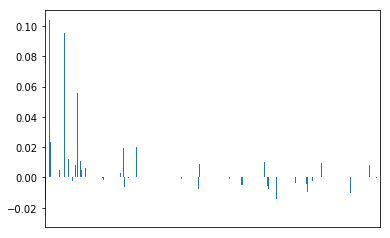

In [72]:
summary.coeff.plot.bar()
plt.xticks([])

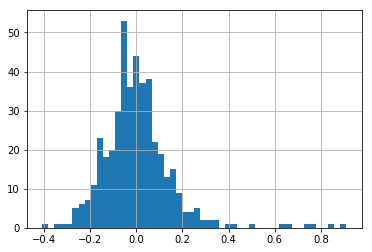

In [75]:
result.error.hist(bins = 50)